In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
canada_path = "canada_project/data/canada_data.csv"
canada_data = pd.read_csv(canada_path)
#canada_data

In [6]:
#canada count test chunk (does not reflect all revisions)
#canada_rev3.count()

GEO              14040
Age group        14040
Sex              14040
Response         14040
Estimates        14040
UOM              14040
SCALAR_FACTOR    14040
VECTOR           14040
VALUE             6231
STATUS            8717
dtype: int64

In [3]:
#drop blank columns
canada_rev1 = canada_data.drop(["SYMBOL", "TERMINATED"], axis=1)
#drop "duplicate" or not useful info
canada_rev2 = canada_rev1.drop(["DGUID", "SCALAR_ID", "UOM_ID", "REF_DATE", "DECIMALS"], axis=1) #STATUS column's purpose unknown at this point
#setting COORDINATE to index
canada_rev3 = canada_rev2.set_index("COORDINATE")
#extra for viewing
canada_rev4 = canada_rev3.copy()

In [4]:
#fill missing values in VALUE and STATUS (while STATUS still exists)
canada_rev4["VALUE"] = canada_rev4["VALUE"].fillna("N/A")
#canada_rev4["STATUS"] = canada_rev4["STATUS"].fillna("N/A") #this one looks stupid on further examination

In [11]:
#making csv to view in excel
#canada_rev3.to_csv("canada_project/data/canada_rev3.csv", index=True, header=True)
#canada_rev4.to_csv("canada_project/data/canada_rev4.csv", index=True, header=True)

In [5]:
#sort into two different dfs: one for percents values and one for raw numbers
canada_percent = canada_rev3[canada_rev3["UOM"] != "Persons"]
canada_persons = canada_rev3[canada_rev3["UOM"] != "Percent"]

In [6]:
#something to play around with; I think it may be useful in early parts of the report; feel free to delete which would be less useful
canada_persons_total = canada_persons[canada_persons["Response"] == "Total, job satisfaction"]
canada_percent_total = canada_percent[canada_percent["Response"] == "Total, job satisfaction"]
canada_persons_total

,GEO,Age group,Sex,Response,Estimates,UOM,SCALAR_FACTOR,VECTOR,VALUE,STATUS
COORDINATE,,,,,,,,,,
1.1.1.1.1,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116319003,15167.0,NaN
1.1.2.1.1,Canada,"Total, 15 years and over",Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116319031,7889.0,NaN
1.1.3.1.1,Canada,"Total, 15 years and over",Female,"Total, job satisfaction",Number of persons,Persons,thousands,v116319059,7278.0,NaN
1.2.1.1.1,Canada,15 to 24 years,Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116319087,2000.0,NaN
1.2.2.1.1,Canada,15 to 24 years,Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116319115,982.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6.9.2.1.1,British Columbia,65 to 74 years,Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116759169,24.0,E
6.9.3.1.1,British Columbia,65 to 74 years,Female,"Total, job satisfaction",Number of persons,Persons,thousands,v116759205,26.0,E
6.10.1.1.1,British Columbia,75 years and over,Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116759241,NaN,F


In [7]:
provinces = canada_rev3[(canada_rev3["GEO"] != "Canada") & (canada_rev3["GEO"] != "Atlantic provinces") & 
                        (canada_rev3["GEO"] != "Prairie provinces")]
#one graphic should be the population distribution of responses; I have an idea but its late so I shouldn't go further 

In [9]:
#canada_persons_no_f = canada_percent = canada_rev3[canada_rev3["STATUS"] != "F"]
#canada_persons_no_f["GEO"].value_counts()
#this is just extra stuff

Canada                       787
Ontario                      635
Prairie provinces            620
Atlantic provinces           586
British Columbia             499
Quebec                       496
Alberta                      468
Manitoba                     416
Saskatchewan                 404
Newfoundland and Labrador    360
Nova Scotia                  360
New Brunswick                360
Prince Edward Island         240
Name: GEO, dtype: int64

In [33]:
#setting up for question 4 i guess
provinces_percent = provinces[provinces["Estimates"] == "Percentage of persons"]
pro_per_2 = provinces_percent[(provinces_percent["Sex"] == "Both sexes") & 
                              (provinces_percent["Response"] != "Total, job satisfaction") &
                             (provinces_percent["Age group"] == "Total, 15 years and over")]
pro_per_3 = pro_per_2[(pro_per_2["Response"] == "Very satisfied or satisfied") | 
                      (pro_per_2["Response"] == "Neither satisfied nor dissatisfied") |
                     (pro_per_2["Response"] == "Dissatisfied or very dissatisfied")]
#setting up for question 4 i guess (but persons)
provinces_people = provinces[provinces["Estimates"] == "Number of persons"]
pro_ple_2 = provinces_people[(provinces_people["Sex"] == "Both sexes") & 
                              (provinces_people["Response"] != "Total, job satisfaction") &
                             (provinces_people["Age group"] == "Total, 15 years and over")]
pro_ple_3 = pro_ple_2[(pro_ple_2["Response"] == "Very satisfied or satisfied") | 
                      (pro_ple_2["Response"] == "Neither satisfied nor dissatisfied") |
                     (pro_ple_2["Response"] == "Dissatisfied or very dissatisfied")]
#omitted the "don't know" rows as there are a significant portion with no value" 
pro_per_3["VALUE"] = pro_per_3["VALUE"].fillna(0)
#pro_per_3
#omitted the "don't know" rows as there are a significant portion with no value (but persons)
pro_ple_3["VALUE"] = pro_ple_3["VALUE"].fillna(0)
#pro_ple_3

C:\Users\epicr\AppData\Local\Temp\ipykernel_15280\2926121836.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_per_3["VALUE"] = pro_per_3["VALUE"].fillna(0)
C:\Users\epicr\AppData\Local\Temp\ipykernel_15280\2926121836.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_ple_3["VALUE"] = pro_ple_3["VALUE"].fillna(0)


,GEO,Age group,Sex,Response,Estimates,UOM,SCALAR_FACTOR,VECTOR,VALUE,STATUS
COORDINATE,,,,,,,,,,
7.1.1.8.1,Newfoundland and Labrador,"Total, 15 years and over",Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116748817,191.0,NaN
7.1.1.4.1,Newfoundland and Labrador,"Total, 15 years and over",Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116748829,17.0,E
7.1.1.9.1,Newfoundland and Labrador,"Total, 15 years and over",Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116748833,7.0,E
8.1.1.8.1,Prince Edward Island,"Total, 15 years and over",Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116749897,52.0,NaN
8.1.1.4.1,Prince Edward Island,"Total, 15 years and over",Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116749909,5.0,E
8.1.1.9.1,Prince Edward Island,"Total, 15 years and over",Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116749913,0.0,F
9.1.1.8.1,Nova Scotia,"Total, 15 years and over",Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116750977,326.0,NaN
9.1.1.4.1,Nova Scotia,"Total, 15 years and over",Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116750989,32.0,E
9.1.1.9.1,Nova Scotia,"Total, 15 years and over",Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116750993,25.0,E


In [37]:
pro_per_3.to_csv("canada_project/data/province_percent.csv", index=True, header=True)
pro_ple_3.to_csv("canada_project/data/province_people.csv", index=True, header=True)

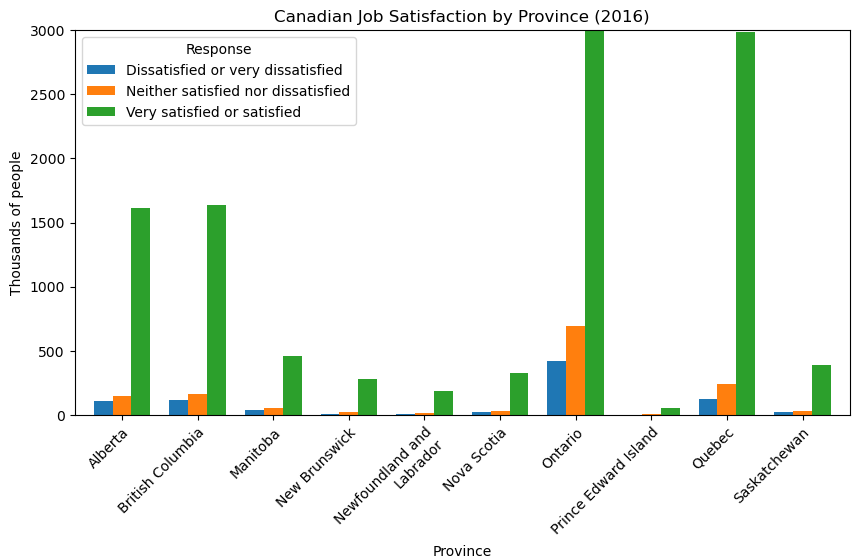

In [89]:
pro_ple_plot1 = pro_ple_3.pivot(index="GEO", columns="Response", 
                values="VALUE").plot(kind="bar", figsize=(10,5),title="Canadian Job Satisfaction by Province (2016)",
                                     xlabel="Province", ylabel="Thousands of people",
                                     width=0.75)
plt.xticks(rotation=45, wrap=True, ha="right")
plt.show()

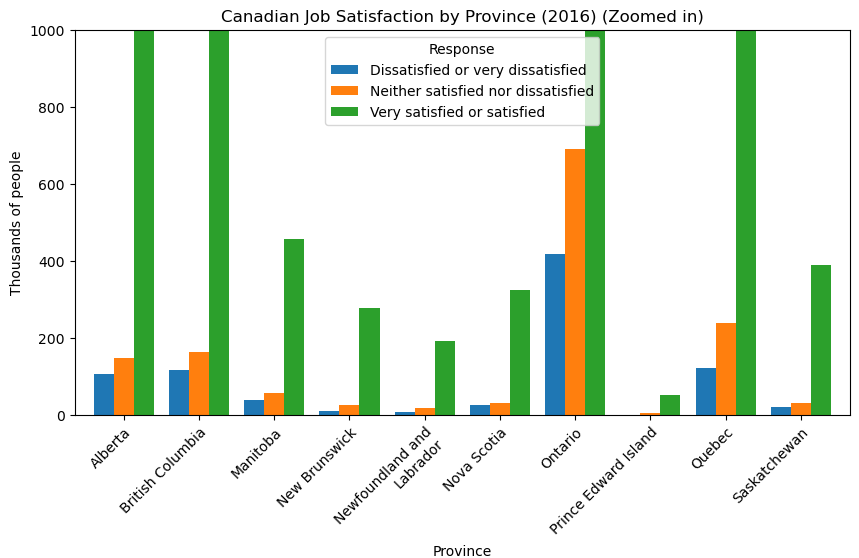

In [95]:
pro_ple_plot2 = pro_ple_3.pivot(index="GEO", columns="Response", 
                                values="VALUE").plot(kind="bar", figsize=(10,5),title="Canadian Job Satisfaction by Province (2016) (Zoomed in)",xlabel="Province", ylabel="Thousands of people",
                                                     width=0.8, ylim=[0,1000])
plt.xticks(rotation=45, wrap=True, ha="right")
plt.show()